In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load 
city_data_load = "data/city_data.csv"
ride_data_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_load, encoding="ISO-8859-1")
ride_data = pd.read_csv(ride_data_load, encoding="ISO-8859-1")

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

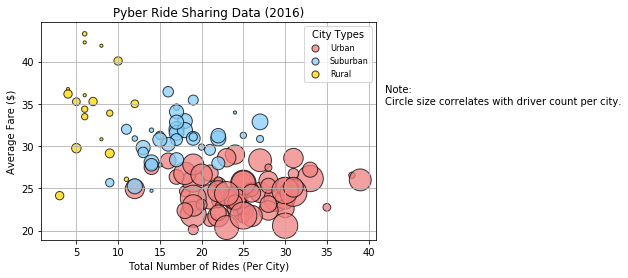

In [2]:
# Data for Settlement Types (Urban, Suburban, Rural)
# Urban Data: Average Fare, Total Number of Rides & Total Number of Drivers Per City
urban_average_fare = pyber_df[pyber_df["type"] == "Urban"].groupby("city").fare.mean()
urban_ride_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").ride_id.count()
urban_driver_total = pyber_df[pyber_df["type"] == "Urban"].groupby("city").driver_count.mean()

# Suburban Data: Average Fare, Total Number of Rides & Total Number of Drivers Per City
suburban_average_fare = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").fare.mean()
suburban_ride_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").ride_id.count()
suburban_driver_total = pyber_df[pyber_df["type"] == "Suburban"].groupby("city").driver_count.mean()

# Rural Data: Average Fare, Total Number of Rides & Total Number of Drivers Per City
rural_average_fare = pyber_df[pyber_df["type"] == "Rural"].groupby("city").fare.mean()
rural_ride_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").ride_id.count()
rural_driver_total = pyber_df[pyber_df["type"] == "Rural"].groupby("city").driver_count.mean()

# Obtain the X and Y Coordinates for Each of the Three Settlement Types
# Urban X and Y Coordinates
ux_axis = urban_ride_total
uy_axis = urban_average_fare
uz_axis = urban_driver_total

# Suburban X and Y Coordinates
sx_axis = suburban_ride_total
sy_axis = suburban_average_fare
sz_axis = suburban_driver_total

# Rural X and Y Coordinates
rx_axis = rural_ride_total
ry_axis = rural_average_fare
rz_axis = rural_driver_total

# Build the scatter plots for each city types
urban_bubble = plt.scatter(ux_axis, uy_axis, s=uz_axis*10, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75, label="Urban")
suburban_bubble = plt.scatter(sx_axis, sy_axis, s=sz_axis*10, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.75, label="Suburban")
rural_bubble = plt.scatter(rx_axis, ry_axis, s=rz_axis*10, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label="Rural")

# Incorporate the other graph properties
# Set Title & Labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()


# Create a legend
lgnd = plt.legend(handles=[urban_bubble, suburban_bubble, rural_bubble], title="City Types", fontsize=8, loc="best") 
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("pyber_ridesharing_data_2016.png")

# Show plot
plt.show()

## Total Fares by City Type

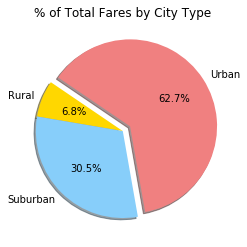

In [3]:
# Calculate Settlement Type Percentage of Total Fares & Dataset
# Sum All Fares
total_settlement_fares = pyber_df.fare.sum()

# Calculate Type Percents
urban_fare_percent = pyber_df[pyber_df["type"] == "Urban"].fare.sum() / total_settlement_fares * 100
suburban_fare_percent = pyber_df[pyber_df["type"] == "Suburban"].fare.sum() / total_settlement_fares * 100
rural_fare_percent = pyber_df[pyber_df["type"] == "Rural"].fare.sum() / total_settlement_fares * 100

# Build Pie Chart
plt.title("% of Total Fares by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [urban_fare_percent, rural_fare_percent, suburban_fare_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("pyber_percentage_fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

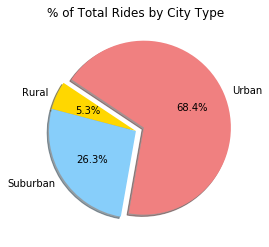

In [4]:
# Calculate Settlement Type Percentage of Total Rides & Dataset
# Count All Rides by ride_id
total_settlement_rides = pyber_df.ride_id.count()

# Calculate Ride Percents
urban_ride_percent = pyber_df[pyber_df["type"] == "Urban"].ride_id.count() / total_settlement_rides * 100
suburban_ride_percent = pyber_df[pyber_df["type"] == "Suburban"].ride_id.count() / total_settlement_rides * 100
rural_ride_percent = pyber_df[pyber_df["type"] == "Rural"].ride_id.count() / total_settlement_rides * 100

# Build Pie Chart
plt.title("% of Total Rides by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [urban_ride_percent, rural_ride_percent, suburban_ride_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=260)

# Save Figure
plt.savefig("pyber_percentage_rides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

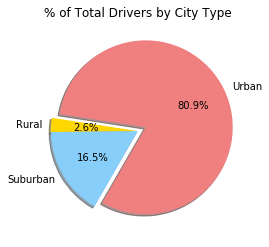

In [15]:
# Calculate Settlement Type Percentage of Total Drivers & Dataset
# Count All Drivers by driver_count
total_settlement_drivers = city_data.driver_count.sum()

# Calculate Driver Percents
urban_driver_percent = city_data[city_data["type"] == "Urban"].driver_count.sum() / total_settlement_drivers * 100
suburban_driver_percent = city_data[city_data["type"] == "Suburban"].driver_count.sum() / total_settlement_drivers * 100
rural_driver_percent = city_data[city_data["type"] == "Rural"].driver_count.sum() / total_settlement_drivers * 100

# Build Pie Charts
plt.title("% of Total Drivers by City Type")
settlement_types = ["Urban", "Rural", "Suburban"]
settlement_percentages = [urban_driver_percent, rural_driver_percent, suburban_driver_percent]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.pie(settlement_percentages, explode=explode, labels=settlement_types, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=240)

# Save Figure
plt.savefig("pyber_percentage_drivers.png")

# Show Figure
plt.show()